Import section.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import models, layers

Using TensorFlow backend.


In [5]:
keras.__version__

'2.2.4'

Read the data set.

In [7]:
df = pd.read_csv("./data/games-expand.csv")
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


In [9]:
df.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
count,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.00000,22905.000000,22905.000000,22905.000000
mean,0.229601,0.131893,0.219079,0.086837,0.206636,0.121546,0.272735,0.30919,0.059856,0.133988,0.132547
std,0.420585,0.338381,0.413631,0.281602,0.404901,0.326767,0.445376,0.46217,0.237225,0.340647,0.339092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Create the training and test data sets.

In [10]:
train = df[5000:]
test = df[:5000]

print(test.shape)
print(train.shape)

(5000, 11)
(17905, 11)


Remove the label feature from the training data set.

In [11]:
x = train.drop(['label'], axis=1)
y = train['label']
x.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
5000,1,1,0,1,1,0,0,0,0,0
5001,0,0,0,0,0,0,1,0,0,0
5002,0,0,0,0,0,0,1,0,0,0
5003,1,0,1,0,0,0,0,0,0,1
5004,0,0,0,0,0,0,0,0,0,0


Define the model.

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W1101 13:59:20.320027 14652 deprecation_wrapper.py:119] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1101 13:59:20.350028 14652 deprecation_wrapper.py:119] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1101 13:59:20.355033 14652 deprecation_wrapper.py:119] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1101 13:59:20.387025 14652 deprecation_wrapper.py:119] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.p

Implement a function to calculate the AUC.

In [13]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc

Build the model.

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=[auc])

W1101 14:03:11.517599 14652 deprecation_wrapper.py:119] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1101 14:03:11.594604 14652 deprecation_wrapper.py:119] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1101 14:03:11.605629 14652 deprecation.py:323] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\tensorflowenv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1101 14:03:11.799638 14652 deprecation.py:323] From C:\Users\IOZZIA\AppData\Local\conda\conda\envs\

Train the model.

In [15]:
history = model.fit(x,
                    y,
                    epochs=100,
                    batch_size=100,
                    validation_split = .2,
                    verbose=0)

Plot the loss (training and validation).

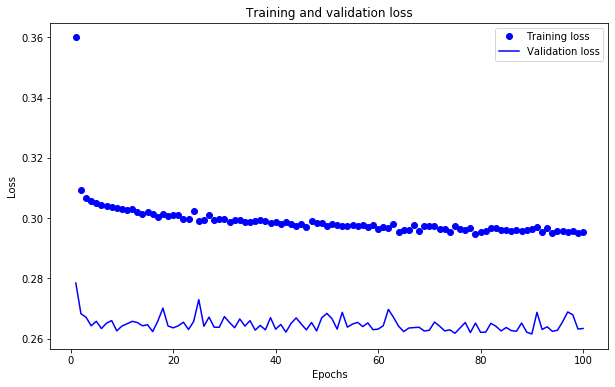

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

%matplotlib inline

plt.figure(figsize=(10,6)) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the AUC (training and validation).

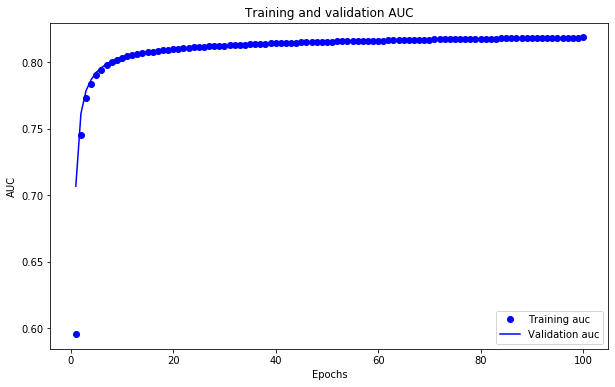

In [18]:
auc = history.history['auc']
val_auc = history.history['val_auc']

plt.figure(figsize=(10,6)) 
plt.plot(epochs, auc, 'bo', label='Training auc')
plt.plot(epochs, val_auc, 'b', label='Validation auc')
plt.title('Training and validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

Remove the *label* feature from the test data set.

In [19]:
x_test = test.drop(['label'], axis=1)
y_test = test['label']

Evaluate the model.

In [22]:
results = model.evaluate(x_test, y_test, verbose = 1)
results

5000/5000 [==============================] - 0s 65us/step


[0.3807331690311432, 0.8185440425872803]

Save the model.

In [24]:
# Serialize model to JSON
model_json = model.to_json()
with open("keras-binary-classifier.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
model.save_weights("keras-binary-classifier.h5")
print("Saved model to disk")

Saved model to disk
